In [393]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Data Cleaning

In [394]:

data = pd.read_excel("Advogados I - Quant Final_20 de fevereiro de 2025_12.57 2.xlsx")
data.head()

/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q10A,Q10A_7_TEXT,Q10B,Q10B_7_TEXT,Q11,Q11_2_TEXT,Q11_3_TEXT,Q12,Q12_6_TEXT,Q13
0,Data de início,Data final,Tipo de resposta,Endereço IP,Progresso,Duração (em segundos),Concluído,Data registrada,ID de resposta,Sobrenome do destinatário,...,Por qual motivo você contratou advogados tempo...,Por qual motivo você contratou advogados tempo...,Por qual motivo você nunca contratou advogados...,Por qual motivo você nunca contratou advogados...,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,Quais empresas você enxerga como referência no...,Quais empresas você enxerga como referência no...,"Você gostaria de fazer alguma observação, suge..."
1,2024-11-12 09:07:32,2024-11-12 09:11:22,0,177.92.69.242,100,230,1,2024-11-12 09:11:23.604000,R_5PA2Aug4ctEytBv,NaN,...,NaN,NaN,7,o recurso para o secondment é consumido do jur...,1,NaN,NaN,4,NaN,NaN
2,2024-11-12 09:15:29,2024-11-12 09:17:55,0,201.90.31.146,100,145,1,2024-11-12 09:17:56.591000,R_1NKCetfrI9y788G,NaN,...,NaN,NaN,1,NaN,1,NaN,NaN,4,NaN,NaN
3,2024-11-12 09:11:15,2024-11-12 09:18:51,0,189.112.183.243,100,456,1,2024-11-12 09:18:52.620000,R_52DcY160wHLcsJc,NaN,...,2,NaN,NaN,NaN,1,NaN,NaN,5,NaN,NaN
4,2024-11-12 09:25:14,2024-11-12 09:27:13,0,104.30.160.205,100,118,1,2024-11-12 09:27:13.686000,R_5ghYNGhVRigNfyX,NaN,...,NaN,NaN,"1,2",NaN,2,Não tenho interesse,NaN,5,NaN,NaN


In [395]:
data.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q10A,Q10A_7_TEXT,Q10B,Q10B_7_TEXT,Q11,Q11_2_TEXT,Q11_3_TEXT,Q12,Q12_6_TEXT,Q13
count,33,33,33,32,33,33,33,33,33,1,...,18,4,10,3,27,7,7,27,5,8
unique,33,33,3,32,3,31,3,33,33,1,...,11,4,9,3,4,7,7,8,5,8
top,Data de início,Data final,0,Endereço IP,100,43,1,Data registrada,ID de resposta,Sobrenome do destinatário,...,2,Por qual motivo você contratou advogados tempo...,2,Por qual motivo você nunca contratou advogados...,1,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,4,Quais empresas você enxerga como referência no...,"Você gostaria de fazer alguma observação, suge..."
freq,1,1,31,1,27,2,27,1,1,1,...,4,1,2,1,14,1,1,11,1,1


In [396]:
'''
Dropando categorias inuteis
'''
data = data.drop("StartDate", axis=1)
data = data.drop("EndDate", axis=1)
data = data.drop("Status", axis=1)
data = data.drop("IPAddress", axis=1)
data = data.drop("Progress", axis=1)
data = data.drop("Duration (in seconds)", axis=1)
data = data.drop("Finished", axis=1)
data = data.drop("RecordedDate", axis=1)
data = data.drop("ResponseId", axis=1)
data = data.drop("RecipientLastName", axis=1)
data = data.drop("RecipientFirstName", axis=1)
data = data.drop("RecipientEmail", axis=1)
data = data.drop("ExternalReference", axis=1)
data = data.drop("DistributionChannel", axis=1)
data = data.drop("UserLanguage", axis=1)

In [397]:
data.head()

,LocationLatitude,LocationLongitude,Q1,Q2,Q3,Q4,Q5,Q6,Q6_5_TEXT,Q7,...,Q10A,Q10A_7_TEXT,Q10B,Q10B_7_TEXT,Q11,Q11_2_TEXT,Q11_3_TEXT,Q12,Q12_6_TEXT,Q13
0,Latitude do local,Longitude do local,Qual é o seu nome?,Em qual empresa você trabalha?,Qual é o seu cargo?,Indique o seu e-mail:,Quantos advogados fazem parte do seu departame...,Qual o maior desafio do seu departamento juríd...,Qual o maior desafio do seu departamento juríd...,De que forma seu departamento jurídico atende ...,...,Por qual motivo você contratou advogados tempo...,Por qual motivo você contratou advogados tempo...,Por qual motivo você nunca contratou advogados...,Por qual motivo você nunca contratou advogados...,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,Quais empresas você enxerga como referência no...,Quais empresas você enxerga como referência no...,"Você gostaria de fazer alguma observação, suge..."
1,-23.6283,-46.6409,Rafael,Echoenergia,gerente jurídico,rafael.renaux@echoenergia.com.br,9,"1,4",NaN,2,...,NaN,NaN,7,o recurso para o secondment é consumido do jur...,1,NaN,NaN,4,NaN,NaN
2,-26.8766,-49.0969,Elisa Gabriela Buse,Karsten S.A.,Coordenadora Jurídica e de Governança Corporativa,elisa.buse@karsten.com.br,4,"1,2,3,4",NaN,2,...,NaN,NaN,1,NaN,1,NaN,NaN,4,NaN,NaN
3,-25.5026,-49.2908,anamaria batista,andritz,senior legal counsel,anamariabatistadavid@gmail.com,11,"3,4",NaN,3,...,2,NaN,NaN,NaN,1,NaN,NaN,5,NaN,NaN
4,-23.5335,-46.6359,Artur Ferraz Martins,Foxbit,Gerente Jurídico e de Compliance,artur.martins@foxbit.com.br,3,4,NaN,2,...,NaN,NaN,"1,2",NaN,2,Não tenho interesse,NaN,5,NaN,NaN


In [398]:
data.describe()

,LocationLatitude,LocationLongitude,Q1,Q2,Q3,Q4,Q5,Q6,Q6_5_TEXT,Q7,...,Q10A,Q10A_7_TEXT,Q10B,Q10B_7_TEXT,Q11,Q11_2_TEXT,Q11_3_TEXT,Q12,Q12_6_TEXT,Q13
count,30.0000,30.0000,32,32,32,32,27,27,4,27,...,18,4,10,3,27,7,7,27,5,8
unique,16.0000,16.0000,30,31,31,32,15,15,4,5,...,11,4,9,3,4,7,7,8,5,8
top,-23.6283,-46.6409,Rafael,Roche,Diretora Juridica,Indique o seu e-mail:,4,"1,4",Qual o maior desafio do seu departamento juríd...,2,...,2,Por qual motivo você contratou advogados tempo...,2,Por qual motivo você nunca contratou advogados...,1,Você pretende utilizar o serviço de advogados ...,Você pretende utilizar o serviço de advogados ...,4,Quais empresas você enxerga como referência no...,"Você gostaria de fazer alguma observação, suge..."
freq,9.0000,9.0000,2,2,2,1,7,3,1,14,...,4,1,2,1,14,1,1,11,1,1


In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LocationLatitude   30 non-null     object
 1   LocationLongitude  30 non-null     object
 2   Q1                 32 non-null     object
 3   Q2                 32 non-null     object
 4   Q3                 32 non-null     object
 5   Q4                 32 non-null     object
 6   Q5                 27 non-null     object
 7   Q6                 27 non-null     object
 8   Q6_5_TEXT          4 non-null      object
 9   Q7                 27 non-null     object
 10  Q7_4_TEXT          3 non-null      object
 11  Q8                 27 non-null     object
 12  Q8_5_TEXT          5 non-null      object
 13  Q9                 27 non-null     object
 14  Q9_4_TEXT          3 non-null      object
 15  Q10A               18 non-null     object
 16  Q10A_7_TEXT        4 non-null      object
 17 

In [400]:
print(data.iloc[-1])

LocationLatitude    -23.6301
LocationLongitude   -46.6378
Q1                       NaN
Q2                       NaN
Q3                       NaN
Q4                       NaN
Q5                       NaN
Q6                       NaN
Q6_5_TEXT                NaN
Q7                       NaN
Q7_4_TEXT                NaN
Q8                       NaN
Q8_5_TEXT                NaN
Q9                       NaN
Q9_4_TEXT                NaN
Q10A                     NaN
Q10A_7_TEXT              NaN
Q10B                     NaN
Q10B_7_TEXT              NaN
Q11                      NaN
Q11_2_TEXT               NaN
Q11_3_TEXT               NaN
Q12                      NaN
Q12_6_TEXT               NaN
Q13                      NaN
Name: 32, dtype: object


A ultima coluna do nosso DataFrame não contem dados, entao vamos dropar 

In [401]:
data = data.drop(data.index[-1])

Dropando colunas de pessaos que não chegaram a realmente preenhcer a pesquisa(só preencheram nome, email e empresa)

In [402]:
data = data.drop(data[data['Q1']=='Roberto Koshiyama'].index)
data = data.drop(data[data['Q1']=='Fabiana'].index)
data = data.drop(data[data['Q1']=='Daniel Pacheco'].index)
data = data.drop(data[data['Q1']=='Flávia Dini'].index)
data = data.drop(data[data['Q1']=='Rafael'].index)

# Latitude e Longitude

In [403]:
data['LocationLatitude'].value_counts(dropna=False)

LocationLatitude
-23.6283              7
-23.5335              4
-23.5475              2
 Latitude do local    1
-26.8766              1
-25.5026              1
-23.1798              1
-15.7783              1
 -36                  1
-22.8305              1
-15.7792              1
 22.2842              1
 40.0558              1
-22.8896              1
-23.6301              1
-16.3293              1
Name: count, dtype: int64

Tanto Latitude quanto Longitude tem valores nulos e também um valor não real, Latitude do local, isso ocorre pq a primeira linha do df é uma descrição da coluna, então vamos dropar

In [404]:
data = data.iloc[1:]

In [405]:
data['LocationLatitude'] = data['LocationLatitude'].dropna()


In [406]:
data['LocationLongitude'] = data['LocationLongitude'].dropna()

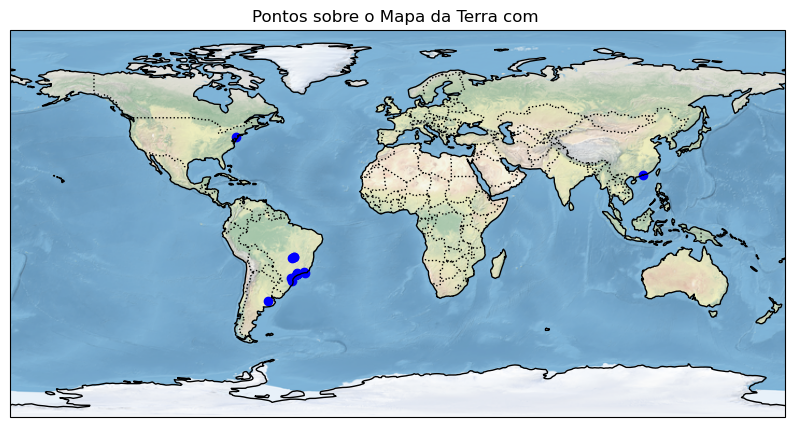

In [407]:


extent = [-180, 180, -90, 90]
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

ax.stock_img()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.scatter(data['LocationLongitude'], data['LocationLatitude'], color='blue', marker='o', transform=projection)

ax.set_title('Pontos sobre o Mapa da Terra com ')
plt.show()

Agora fazendo um plot dos pontos só no Brasil

/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/jgfaraco/miniconda3/envs/env/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


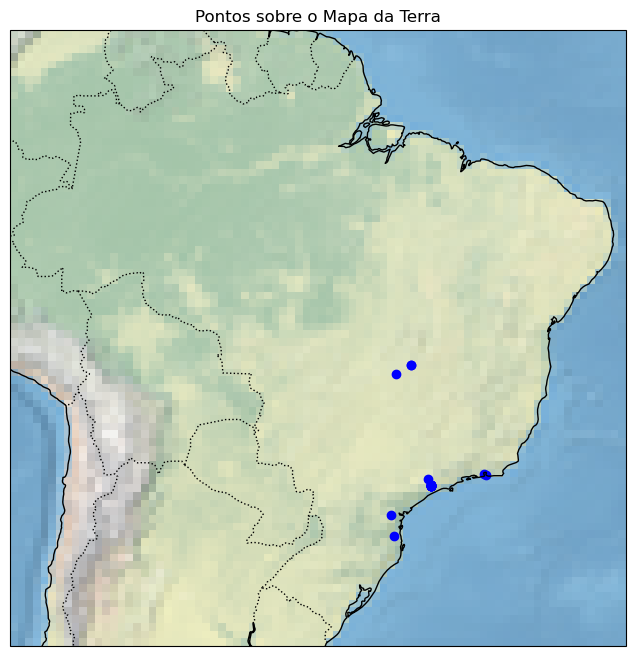

In [408]:

extent = [-180, 180, -90, 90]
projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=projection)

ax.stock_img()

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-74, -34, -34, 6], crs=projection)
ax.scatter(data['LocationLongitude'], data['LocationLatitude'], color='blue', marker='o', transform=projection)

ax.set_title('Pontos sobre o Mapa da Terra')
plt.show()

# Q2(Pulamos a Q1 já que se trata sobre o nome das pessoas)

In [409]:
data['Q2'].value_counts(dropna=False)

Q2
Karsten S.A.                          1
hp brasil                             1
Habib´s                               1
Ontex                                 1
S.I.N                                 1
Pitzi                                 1
Goodman                               1
Petlove                               1
Puratos Brasil                        1
Suzano S.A                            1
Atvos Agroindustrial                  1
banco do brasil                       1
Regreen                               1
andritz                               1
Airbus | Helibras                     1
Grafeno Digital                       1
Grupo Bisutti                         1
GM Financial.                         1
RFM Incorporadora                     1
Anônimo                               1
Roche                                 1
Livelo S.A                            1
Cinepolis                             1
Foxbit                                1
Credz S/A Instituição de Pagamento   

In [410]:
data['Q2'].unique()

array(['Karsten S.A.', 'andritz', 'Foxbit', 'Cinepolis', 'Livelo S.A',
       'Roche', 'Anônimo', 'RFM Incorporadora', 'GM Financial.',
       'Grupo Bisutti', 'Grafeno Digital', 'Airbus | Helibras', 'Regreen',
       'hp brasil', 'banco do brasil', 'Atvos Agroindustrial',
       'Suzano S.A', 'Puratos Brasil', 'Petlove', 'Goodman ', 'Pitzi',
       'S.I.N', 'Ontex', 'Habib´s', 'Credz S/A Instituição de Pagamento'],
      dtype=object)

 A variável Credz S/A Instituição de Pagamento é muito longa, pode distorcer nosso plot, portanto vamos mudar o nome dela

In [411]:
data['Q2'] = data['Q2'].replace('Credz S/A Instituição de Pagamento', 'Credz S/A')


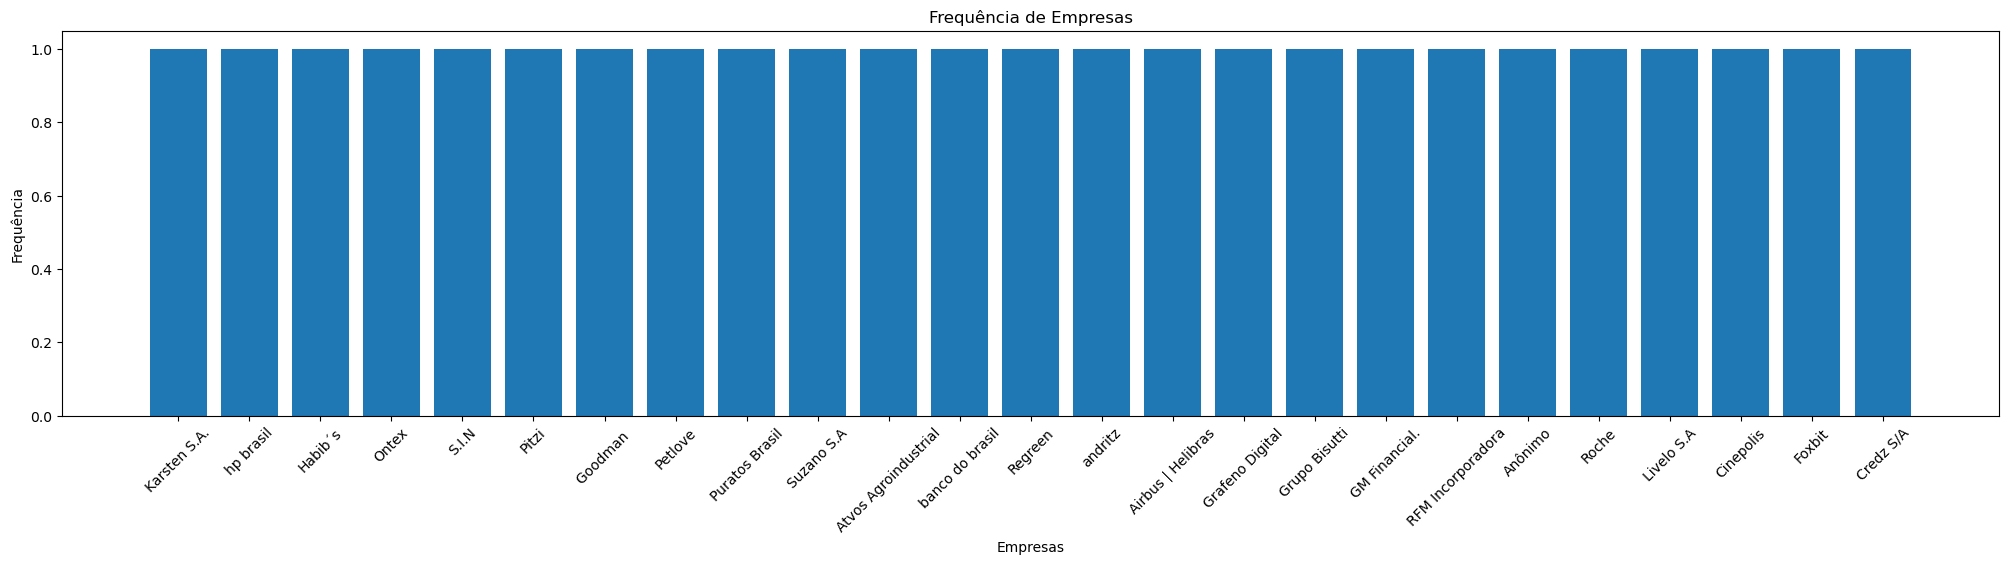

In [412]:

counts = data['Q2'].value_counts(dropna=True)

plt.figure(figsize=(25,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Empresas')
plt.ylabel('Frequência')
plt.title('Frequência de Empresas')
plt.xticks(rotation=45)
plt.show()

Empresas bem diversas, seria interessante separa-las por setor

Separei as empresas por setores, agora vamos adicionar uma coluna no nosso DataFrame que representa o Setor no qual aquele individuo trabalha

In [413]:


data.loc[data['Q2'].isin(['Echoenergia', 'andritz', 'Ivi Energia ']), 'Setores'] = 'Energia'
data.loc[data['Q2'].isin(['Roche', 'S.I.N']), 'Setores'] = 'Saude'
data.loc[data['Q2'] == 'Karsten S.A.', 'Setores'] = 'Textil'
data.loc[data['Q2'] == 'Foxbit', 'Setores'] = 'Criptoativos'
data.loc[data['Q2'] == 'Cinepolis', 'Setores'] = 'Cinema'
data.loc[data['Q2'].isin(['Livelo S.A', 'GM Financial.', 'Grafeno Digital', 'banco do brasil', 'Credz S/A']), 'Setores'] = 'Servicos Financeiros'
data.loc[data['Q2'].isin(['RFM Incorporadora', 'Goodman ', 'Iguatemi']), 'Setores'] = 'Imobiliario'
data.loc[data['Q2'].isin(['Grupo Bisutti', 'Habib´s', 'Puratos Brasil','Atvos Agroindustrial']), 'Setores'] = 'Alimenticio'
data.loc[data['Q2'] == 'Airbus | Helibras', 'Setores'] = 'Aeroespacial'
data.loc[data['Q2'] == 'Regreen', 'Setores'] = 'Restauracao Ecologica'
data.loc[data['Q2'].isin(['hp brasil', 'Globalweb', 'Pitzi']), 'Setores'] = 'Informatica'
data.loc[data['Q2'] == 'Suzano S.A', 'Setores'] = 'Papel e Celulose'
data.loc[data['Q2'] == 'Petlove', 'Setores'] = 'Pet'
data.loc[data['Q2'] == 'Ontex', 'Setores'] = 'Consumo nao-ciclico'
data.loc[data['Q2'] == 'Globo', 'Setores'] = 'Midia e Comunicacao'


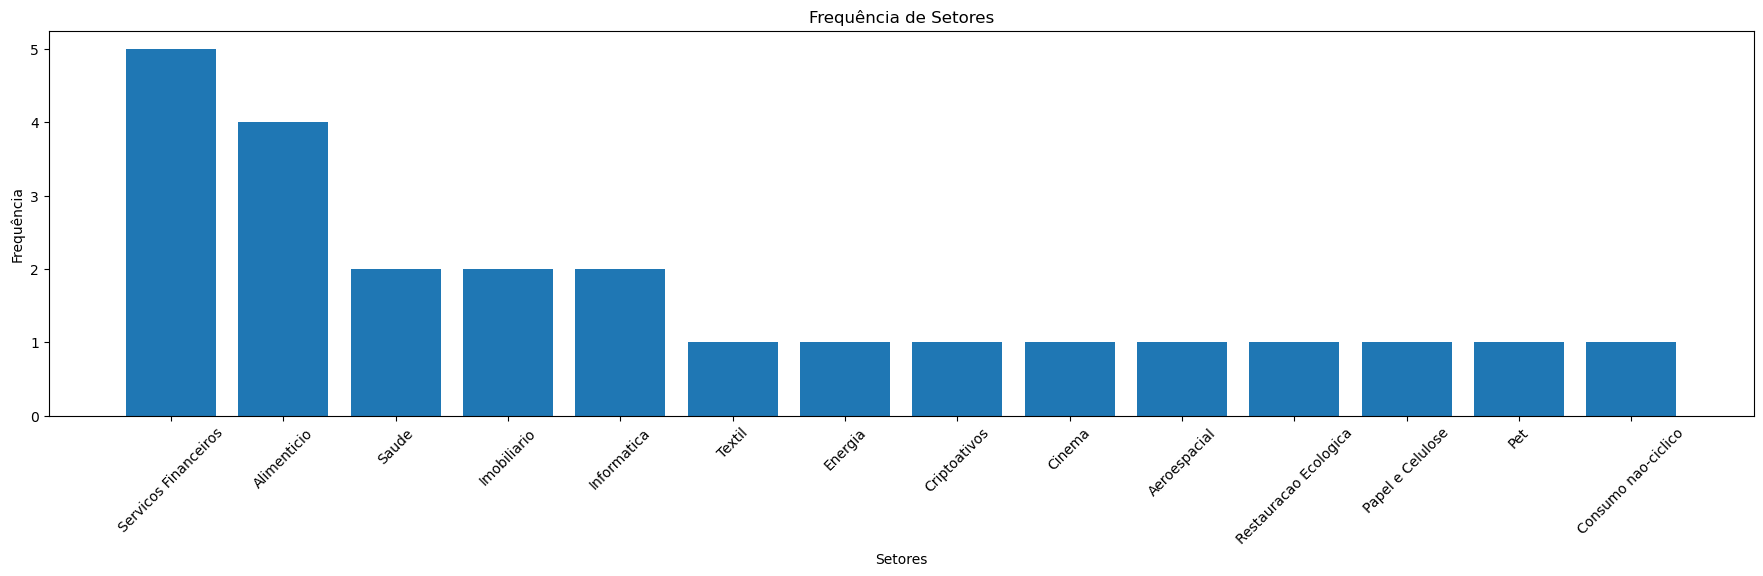

In [414]:

counts = data['Setores'].value_counts(dropna=True)

plt.figure(figsize=(22,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Setores')
plt.ylabel('Frequência')
plt.title('Frequência de Setores')
plt.xticks(rotation=45)
plt.show()

Podemos ver que os setores de Serviços Financeiros e o Alimentício são os que mais dominam

# Q3(cargo da pessoa na empresa)

In [415]:
data['Q3'].value_counts(dropna=False)

Q3
Coordenadora Jurídica e de Governança Corporativa    1
country counsel                                      1
Gerente Sênior                                       1
Coord Jurídico e DPO                                 1
Coordenador Juridico                                 1
Legal Ops.                                           1
diretora executiva                                   1
Gerente de Contratos, Contencioso e Consultivo       1
Gerente Jurídica                                     1
Vice-Presidente Executivo                            1
Coordenador jurídico tributário                      1
agente comercial                                     1
Diretora Juridica                                    1
senior legal counsel                                 1
Head of Legal, Compliance & Corporate Governance     1
Diretor Jurídico e Regulatório                       1
Gerente Jurídico                                     1
Superintendente executiva de finanças                1
Coorden

Dando uma olhada rápida, é possível notar que a maioria dos cargos são da area jurídica das empresas, vamos tentar confirmar isso mesmo

In [416]:

data.loc[data['Q3'].str.contains(r"jur[ií]dic[oa]|legal", case=False, na=False), 'area de atuacao'] = 'juridica'


In [417]:
if data['area de atuacao'].isnull().sum() > 0:
    data.loc[data['area de atuacao'].isnull(), 'area de atuacao'] = 'Outros'
data['area de atuacao'].value_counts(dropna=False)

area de atuacao
juridica    16
Outros       9
Name: count, dtype: int64

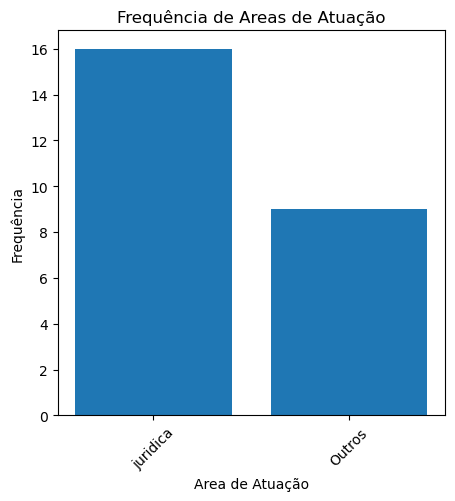

In [418]:
counts = data['area de atuacao'].value_counts(dropna=True)

plt.figure(figsize=(5,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Area de Atuação')
plt.ylabel('Frequência')
plt.title('Frequência de Areas de Atuação')
plt.xticks(rotation=45)
plt.show()

Alguns não especificam os cargos, por exemplo só colocam Diretor, então não conseguimos fazer uma análise realmente profunda da area de atuação. Mas podemos confirmar que a maioria atua na area juridica

#  Q5(pulamos Q4 porque é a coluna do email), Q5 indica a quantidade de advogados que fazem parte do departamento jurídico da empresa 

In [419]:
data['Q5'].value_counts(dropna=False)

Q5
4                                       7
3                                       6
1                                       2
11                                      1
9 (NOVE)                                1
11 diretos, 8 através de SLA interno    1
16                                      1
2                                       1
nao sei                                 1
30                                      1
62                                      1
13                                      1
6                                       1
Name: count, dtype: int64

Tratando alguns valores que estão errados

In [420]:
data['Q5'] = data['Q5'].replace('9 (NOVE)', 9)
data['Q5'] = data['Q5'].replace('11 diretos, 8 através de SLA interno', 19)
data['Q5'] = data['Q5'].replace('nao sei', None)

Lembrando que as respostas estao em tipo str, entao tempos que transformar para int

In [421]:
data['Q5'] = pd.to_numeric(data['Q5'], errors='coerce')

Entendendo um pouco melhor a distribuição

In [422]:
data['Q5'].describe()

count    24.000000
mean      9.000000
std      13.181014
min       1.000000
25%       3.000000
50%       4.000000
75%       9.500000
max      62.000000
Name: Q5, dtype: float64

Podemos ver que são dados que variam bastante, podemos notar isso pelo valor alto de desvio padrão 12.9 e pelo fato que o valor max é bem maior que a média, entao esperamos ser dados com bastante outliers, por isso fica mais fácil analisar esses dados por um histograma do que por um boxplot.

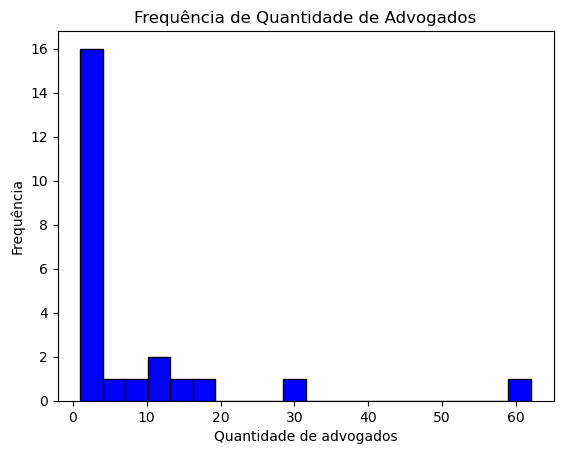

In [423]:


dados_filtrados = data['Q5'].dropna()

plt.hist(dados_filtrados, bins=20, color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')
plt.show()


Podemos notar que não conseguimos ver a distribuição corretamente por conta de outliers, vamos tentar limitar para tratar esse problema

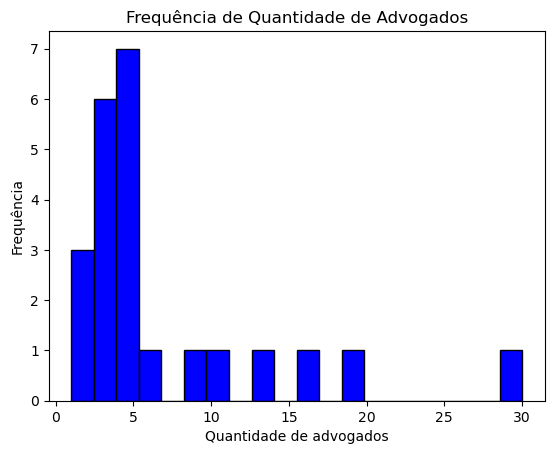

In [424]:
''' 
Filtra apenas os valores menores ou iguais a 60
'''
dados_filtrados = dados_filtrados[dados_filtrados <= 60]
plt.hist(dados_filtrados, bins=20, color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')
plt.show()

Podemos ver que nesse plot aimda temos um outlier mas a distribuição parece que se concentra entre 0 a 10, vamos tentar remover esse segundo outlier

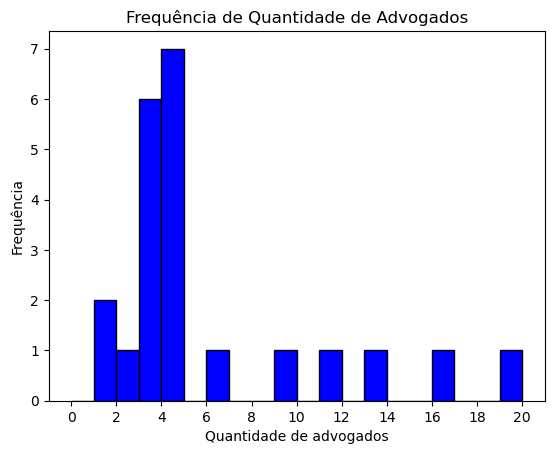

In [425]:
''' 
Filtra apenas os valores menores ou iguais a 21
'''
dados_filtrados = dados_filtrados[dados_filtrados <= 21]
plt.hist(dados_filtrados, bins=range(0, 21), color='blue', edgecolor='black')
plt.xlabel('Quantidade de advogados')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Advogados')

plt.xticks(range(0, 21,2))
plt.show()

Agora sim, fica claro que a maioria dos valores estão entre 3 e 5 advogados

Box plot desses dados sem os dois grandes outliers

Text(0.5, 1.0, 'Boxplot da Quantidade de Advogados')

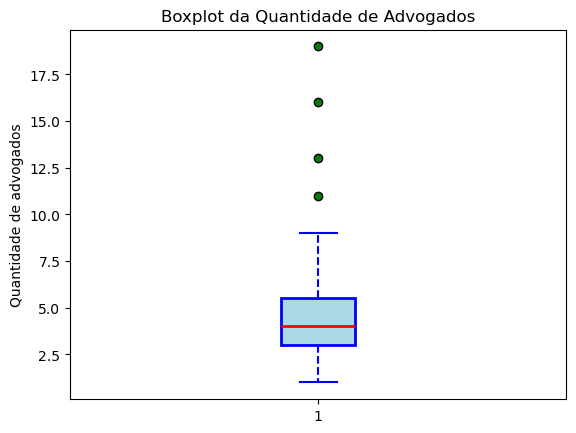

In [426]:

boxprops = dict(facecolor='lightblue', color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linestyle='--', linewidth=1.5)
capprops = dict(color='blue', linewidth=1.5)
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')

fig, ax = plt.subplots()

ax.boxplot(dados_filtrados, patch_artist=True,
           boxprops=boxprops,
           medianprops=medianprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           flierprops=flierprops)

ax.set_ylabel('Quantidade de advogados')
ax.set_title('Boxplot da Quantidade de Advogados')


Podemos ver que os outliers ainda acabam puxando muito o quartil 75% e o fio de bigode de cima, mas a mediana fica ali entre 3 e 4 como vimos no histograma, perto do quartil 25%. 

# Q6(Qual o maior desafio do seu departamento jurídico)

In [427]:
data['Q6'].value_counts(dropna=False)

Q6
3          3
1,3        3
1,2,3,4    2
3,4        2
4          2
2          2
1          2
1,4        2
1,2,3      2
1,3,4,5    1
1,2        1
1,5        1
5          1
2,3,4      1
Name: count, dtype: int64

Fazendo o plot da frequencia de cada opção

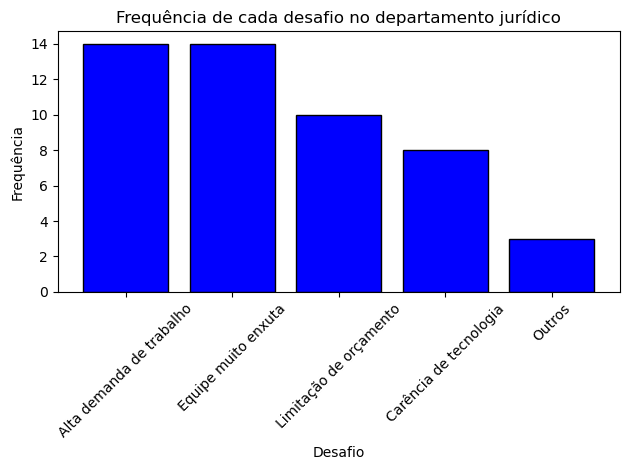

In [428]:

q6_series = data['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Maioria é Alta demnada de trabalho e equipe muito enxuta

Se filtrarmos por empresa de diferentes setores, o padrão de respostas fica o mesmo?

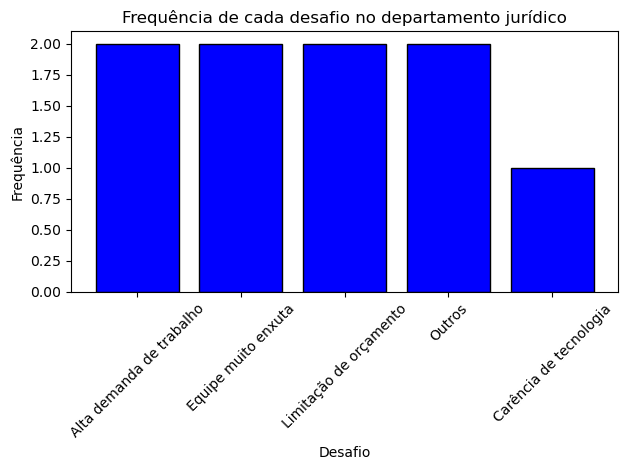

In [429]:
data_servicos_financeiros = data[data['Setores'] == 'Servicos Financeiros']
q6_series = data_servicos_financeiros['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


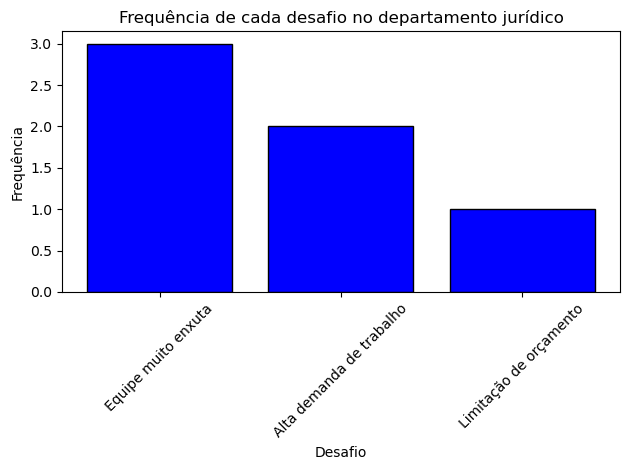

In [430]:
data_alimentos = data[data['Setores'] == 'Alimenticio']
q6_series = data_alimentos['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

Não é possível tirar nenhuma conclusão se o setor influencia na frequência dos desafios por conta de termos muitos poucos dados

Será que o tamanho da equipe jurídica impacta nos desafios? Vamos separar em equipes pequenas, médias e grandes, equipes pequenas são de 1 a 3, médias de 4 a 8 e grandes de 9 para cima(separei considerando os quartieis desses dados)

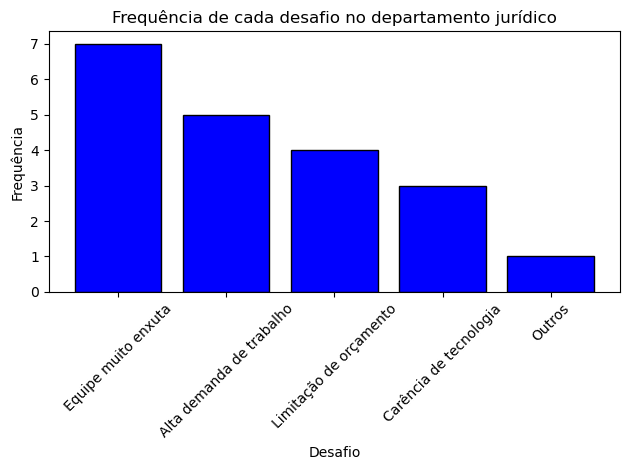

In [431]:
data_equipe_pequena = data[data['Q5']<=3]
q6_series = data_equipe_pequena['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


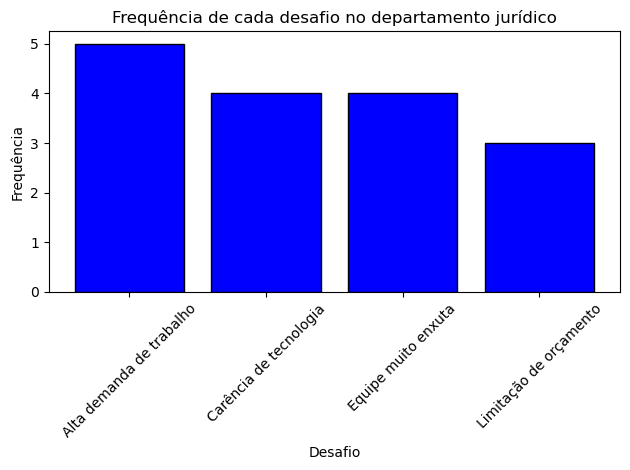

In [432]:
data_equipe_média = data[(data['Q5'] > 3) & (data['Q5'] < 8)]
q6_series = data_equipe_média['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()

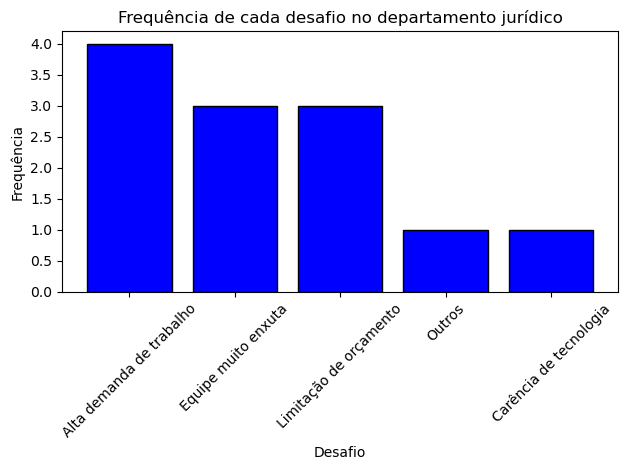

In [433]:
data_equipe_grande = data[data['Q5']>=9]
q6_series = data_equipe_grande['Q6'].dropna().astype(str)
all_choices = []
for resp in q6_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices.extend(choices)

counts = pd.Series(all_choices).value_counts()

descricao_map = {
    '1': 'Alta demanda de trabalho',
    '2': 'Carência de tecnologia',
    '3': 'Equipe muito enxuta',
    '4': 'Limitação de orçamento',
    '5': 'Outros'
}

counts.index = counts.index.map(descricao_map)

plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45) 
plt.tight_layout()      
plt.show()


Podemos identificar que nas equipes pequenas o maior desafio é que a equipe é muoto enxuta(o que era esperado), mas para as equipes médias e grandes acaba sendo bem divido mas a alta demanda de trabalho acaba se destacando 

Analisando os Outros

In [434]:
data['Q6_5_TEXT'].value_counts()

Q6_5_TEXT
Equipe muito jovem                                                  1
Aliar qualidade com velocidade no atendimento das áreas clientes    1
nao uso                                                             1
Name: count, dtype: int64

Segunda resposta não ficou clara

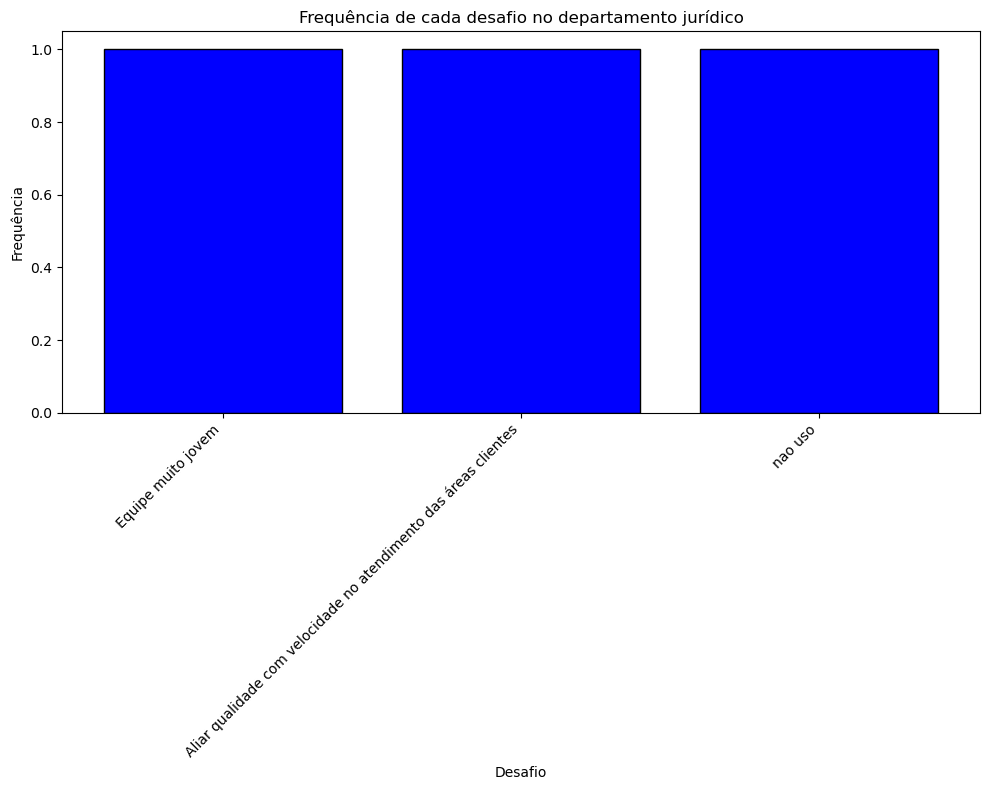

In [435]:

outros_text_counts = data['Q6_5_TEXT'].dropna().value_counts()
outros_text_counts.index = outros_text_counts.index

plt.figure(figsize=(10,8))
plt.bar(outros_text_counts.index, outros_text_counts.values, color='blue', edgecolor='black')
plt.xlabel('Desafio')
plt.ylabel('Frequência')
plt.title('Frequência de cada desafio no departamento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: A atla demanda de trabalho e equipe enxuta acabam sendo os maiores desafios enfrentados pelas empresas em seus departamentos jurídicos, o tamanho da equipe e o setor da empresa pouco influenciam essa variável 

#  Q7(De que forma seu departamento jurídico atende suas demandas jurídicas?)

In [436]:
data['Q7'].value_counts(dropna=False)

Q7
2    13
3     9
4     2
1     1
Name: count, dtype: int64

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/3779591054.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


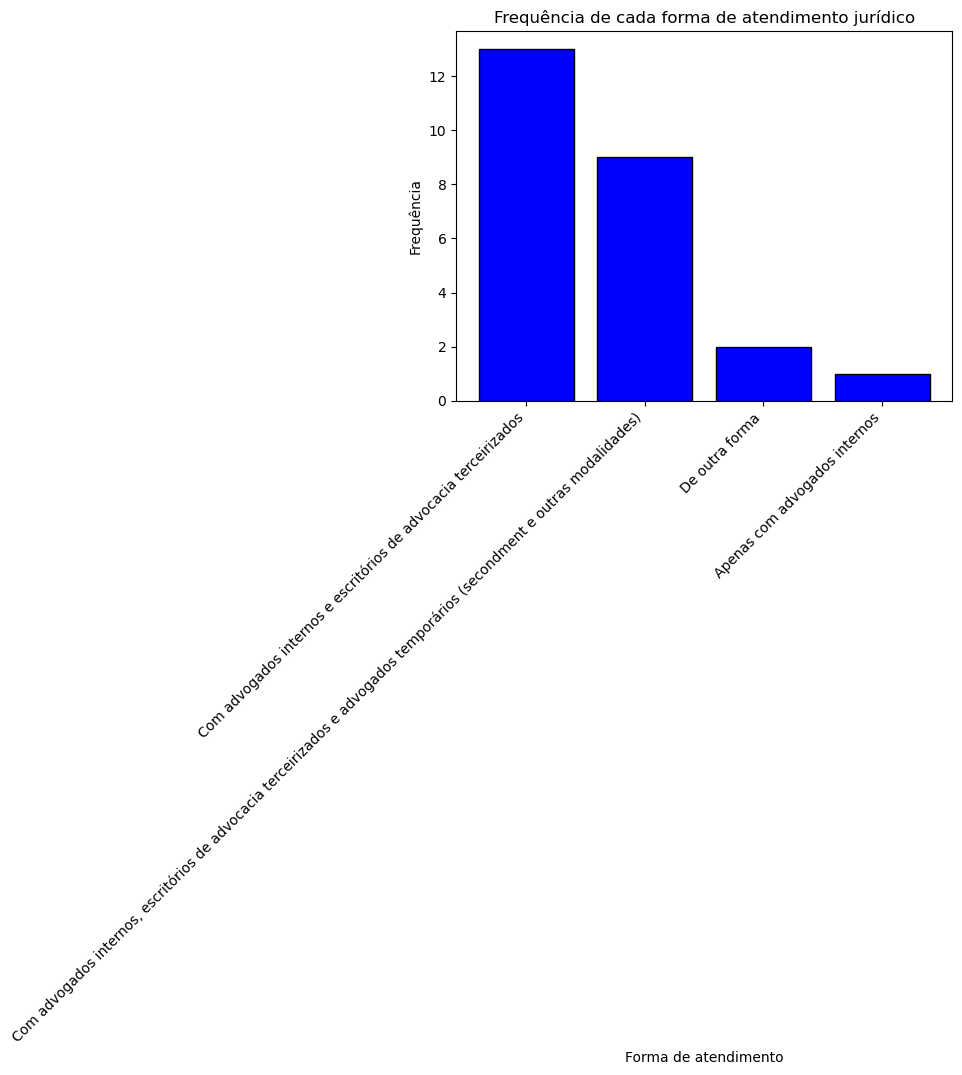

In [437]:

q7_series = data['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [438]:
data['Q7_4_TEXT'].value_counts()

Q7_4_TEXT
principalmente advogados internos    1
funci na agencia                     1
Name: count, dtype: int64

Calucando a correlação entre Setores e a Q7

In [439]:

df_corr = data[['Q7', 'Setores']].dropna()

df_corr['Q7'] = df_corr['Q7'].astype(str)
df_corr['Setores'] = df_corr['Setores'].astype(str)

le_q7 = LabelEncoder()
le_setores = LabelEncoder()

df_corr['Q7_encoded'] = le_q7.fit_transform(df_corr['Q7'])
df_corr['Setores_encoded'] = le_setores.fit_transform(df_corr['Setores'])

correlation = df_corr['Q7_encoded'].corr(df_corr['Setores_encoded'])
print("Correlação entre Q7 e Setores (Label Encoding):", correlation)


Correlação entre Q7 e Setores (Label Encoding): -0.06760461457806434


Muito pouco correlacionado! Não vale nem a pena analisar por cada setor

Será que o tamanho da equipe jurídica impacta na forma de atnedimento? Vamos separar em equipes pequenas, médias e grandes, equipes pequenas são de 1 a 3, médias de 4 a 8 e grandes de 9 para cima(separei considerando os quartieis desses dados)

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/1461294569.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


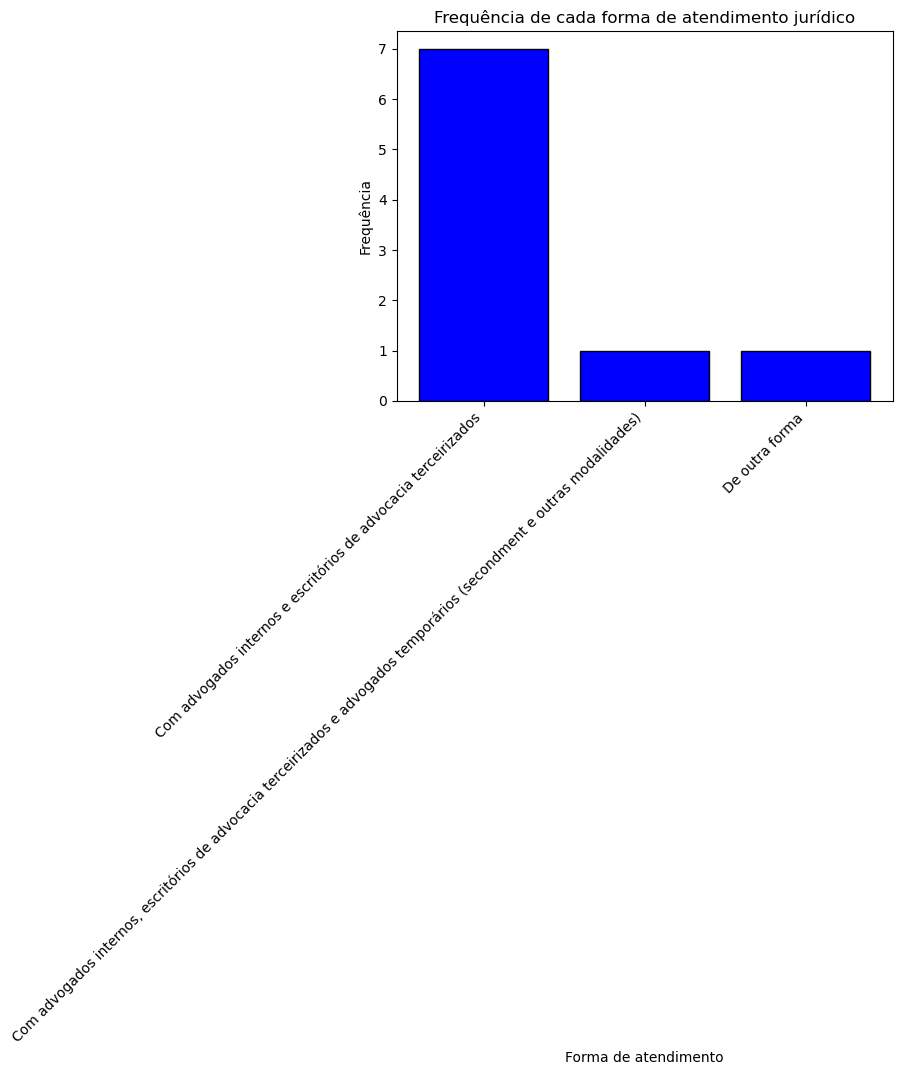

In [440]:

q7_series = data_equipe_pequena['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/1098757077.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


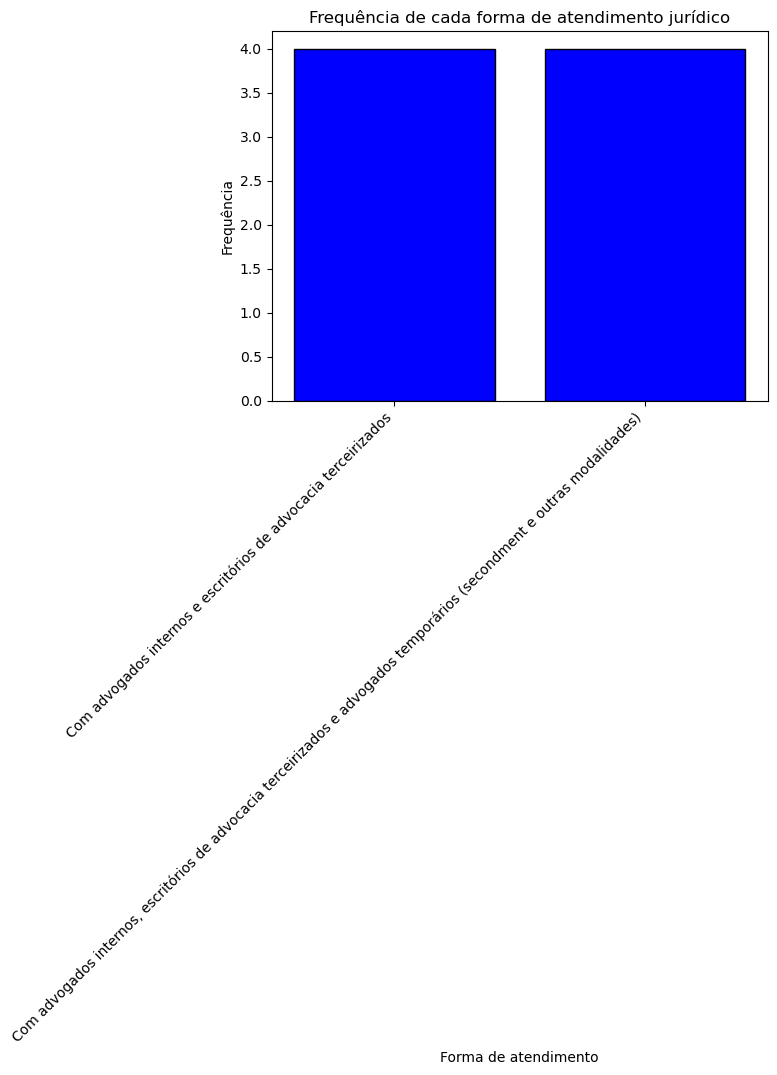

In [441]:

q7_series = data_equipe_média['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários (secondment e outras modalidades)',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_31008/2558786379.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


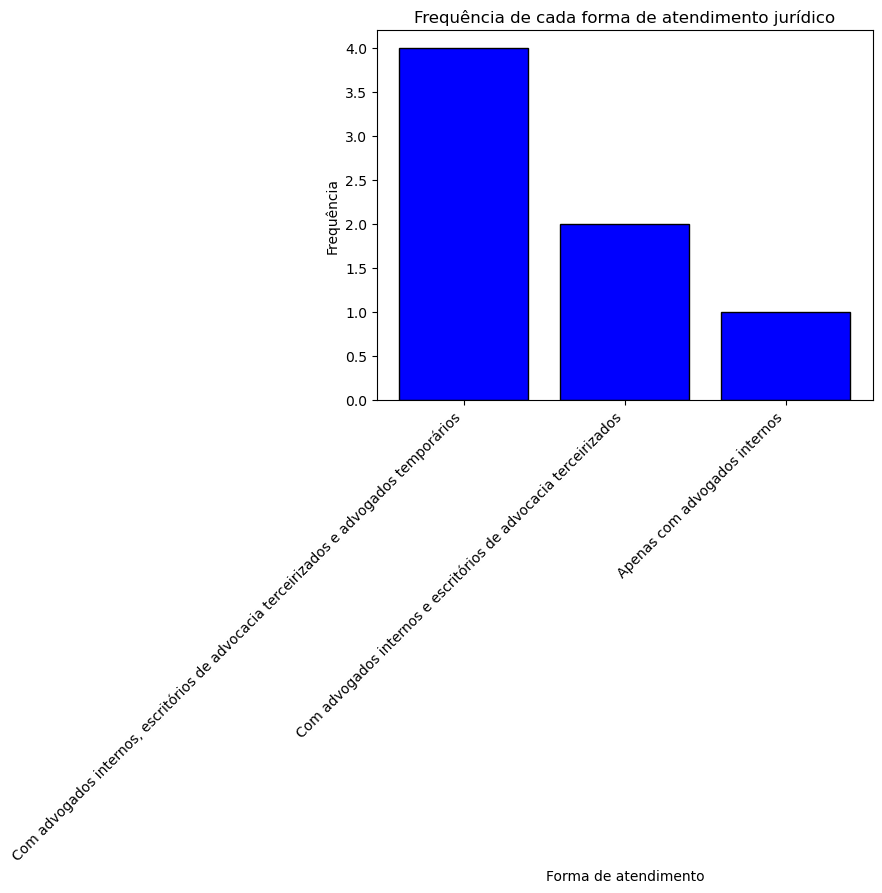

In [448]:

q7_series = data_equipe_grande['Q7'].dropna().astype(str)
all_choices_q7 = []
for resp in q7_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q7.extend(choices)

counts_q7 = pd.Series(all_choices_q7).value_counts()
descricao_map_q7 = {
    '1': 'Apenas com advogados internos',
    '2': 'Com advogados internos e escritórios de advocacia terceirizados',
    '3': 'Com advogados internos, escritórios de advocacia terceirizados e advogados temporários',
    '4': 'De outra forma'
}
counts_q7.index = counts_q7.index.map(descricao_map_q7)
plt.bar(counts_q7.index, counts_q7.values, color='blue', edgecolor='black')
plt.xlabel('Forma de atendimento')
plt.ylabel('Frequência')
plt.title('Frequência de cada forma de atendimento jurídico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Resumo: A maioria das empresas usam atendimento jurídico com advogados internos e escritórios de advogacia terceirizados, uma quantidade consideravel também usa advogados temporários. O tamanho da equipe jurídica da empresa influencia o tipo de atendimento jurídico que a empresa recebe, quanto maior a empresa mais se tende a usar advogados temporários

#  Q8(Assinale dois atributos principais que você espera encontrar ao contratar serviços jurídicos externos (escritórios de advocacia e advogados temporários))

In [443]:
data['Q8'].value_counts(dropna=False)

Q8
1,4          7
1,3          5
1,2,3,4      3
1,3,4        3
5            2
1,2          1
1,2,3,4,5    1
1,4,5        1
2,3,4        1
1,2,4        1
Name: count, dtype: int64

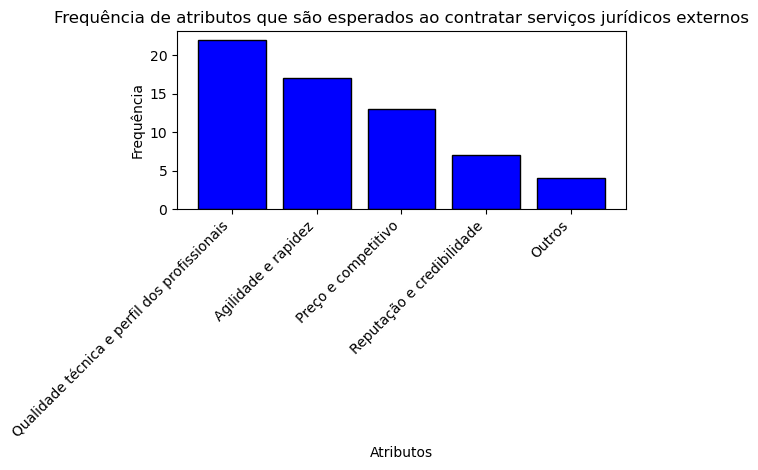

In [447]:
q8_series = data['Q8'].dropna().astype(str)
all_choices_q8 = []
for resp in q8_series:
    choices = [x.strip() for x in resp.split(',')]
    all_choices_q8.extend(choices)

counts_q8 = pd.Series(all_choices_q8).value_counts()
descricao_map_q8 = {
    '1': 'Qualidade técnica e perfil dos profissionais',
    '2': 'Reputação e credibilidade',
    '3': 'Preço e competitivo',
    '4': 'Agilidade e rapidez',
    '5':'Outros'
}
counts_q8.index = counts_q8.index.map(descricao_map_q8)
plt.bar(counts_q8.index, counts_q8.values, color='blue', edgecolor='black')
plt.xlabel('Atributos')
plt.ylabel('Frequência')
plt.title('Frequência de atributos que são esperados ao contratar serviços jurídicos externos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [449]:
data['Q8_5_TEXT'].value_counts()

Q8_5_TEXT
Entendimento e mentalidade voltada ao mundo dos negócios e linguagem acessível                                                                                                                                                                                                                           1
Risco                                                                                                                                                                                                                                                                                                    1
saber e atitude juridico.                                                                                                                                                                                                                                                                                1
Os atributos dependem do tipo de serviço requisitado. Alta qualidade técnica são requisitos p

Calculando a correlação entre Setores e Q8

In [450]:
df_corr = data[['Q8', 'Setores']].dropna()

df_corr['Q8'] = df_corr['Q8'].astype(str)
df_corr['Setores'] = df_corr['Setores'].astype(str)

le_q8 = LabelEncoder()
le_setores = LabelEncoder()

df_corr['Q8_encoded'] = le_q8.fit_transform(df_corr['Q8'])
df_corr['Setores_encoded'] = le_setores.fit_transform(df_corr['Setores'])

correlation = df_corr['Q8_encoded'].corr(df_corr['Setores_encoded'])
print("Correlação entre Q8 e Setores (Label Encoding):", correlation)

Correlação entre Q8 e Setores (Label Encoding): -0.09390885391024138


Pouco correlacionado!

Será que o tamanho da equipe impacta nas respostas?